<a href="https://colab.research.google.com/github/gerelmaa-b/diveintocode/blob/main/FasterRCNNandYOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

################## Problem 1 ################### 
# Learning and Estimation
# Please refer to the README to run the above implementation.

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('/content/drive/My Drive/DIVEINTOCODE/FasterRCNNandYOLO3') 
#os.chdir('/content/FasterRCNNandYOLO3')
print(os.getcwd())

/content/drive/My Drive/DIVEINTOCODE/FasterRCNNandYOLO3


In [1]:
%tensorflow_version 1.x
import tensorflow as tf
import keras


print(tf.__version__)
print(keras.__version__)

After that, `%tensorflow_version 1.x` will throw an error.

Your notebook should be updated to use Tensorflow 2.
See the guide at https://www.tensorflow.org/guide/migrate#migrate-from-tensorflow-1x-to-tensorflow-2.

TensorFlow 1.x selected.
1.15.2
2.3.1


Using TensorFlow backend.


In [17]:
! python train.py -p annotation.txt

Using TensorFlow backend.
Parsing annotation files
Training images per class (19 classes) :
{'abraham_grampa_simpson': 687,
 'apu_nahasapeemapetilon': 206,
 'bart_simpson': 650,
 'bg': 0,
 'charles_montgomery_burns': 650,
 'chief_wiggum': 209,
 'comic_book_guy': 208,
 'edna_krabappel': 212,
 'homer_simpson': 718,
 'kent_brockman': 213,
 'krusty_the_clown': 429,
 'lisa_simpson': 756,
 'marge_simpson': 629,
 'milhouse_van_houten': 210,
 'moe_szyslak': 403,
 'ned_flanders': 675,
 'nelson_muntz': 219,
 'principal_skinner': 614,
 'sideshow_bob': 201}
-------------------------------
path to config file : ./save/train_20220720-080338_config.pickle
-------------------------------
in the faster rcnn c: <model.config.Config object at 0x7f8307450710>
in the faster classes count c: {'abraham_grampa_simpson': 687, 'apu_nahasapeemapetilon': 206, 'bart_simpson': 650, 'charles_montgomery_burns': 650, 'chief_wiggum': 209, 'comic_book_guy': 208, 'edna_krabappel': 212, 'homer_simpson': 718, 'kent_brockma

In [14]:
!pip3 install PyJWT


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
!token.encode().decode('UTF-8')

/bin/bash: -c: line 0: syntax error near unexpected token `.decode'
/bin/bash: -c: line 0: `token.encode().decode('UTF-8')'


In [12]:
!pip install h5py==2.10.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.9 MB 5.2 MB/s 
  Attempting uninstall: h5py
    Found existing installation: h5py 3.1.0
    Uninstalling h5py-3.1.0:
      Successfully uninstalled h5py-3.1.0


In [7]:
import h5py
print(h5py.__version__)

3.1.0


In [18]:
!python predict.py -i ./kaggle_simpson_testset_small -c ./save/train_20220720-080338_config.pickle

Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
call x shape: (?, ?, ?, 64)
call x shape: (?, ?, ?, 64)
call x shape: (?, ?, ?, 64)
call x shape: (?, ?, ?, 256)
call x shape: (?, ?, ?, 256)
call x shape: (?, ?, ?, 64)
call x shape: (?, ?, ?, 64)
call x shape: (?, ?, ?, 256)
call x shape: (?, ?, ?, 64)
call x shape: (?, ?, ?, 64)
call x shape: (?, ?, ?, 256)
call x shape: (?, ?, ?, 128)
call x shape: (?, ?, ?, 128)
call x shape: (?, ?, ?, 512)
call x shape: (?, ?, ?, 512)
call x shape: (?, ?, ?, 128)
call x shape: (?, ?, ?, 128)
call x shape: (?, ?, ?, 512)
call x shape: (?, ?, ?, 128)
call x shape: (?, ?, ?, 128)
call x shape: (?, ?, ?, 512)
call x shape: (?, ?, ?, 128)
call x shape: (?, ?, ?, 128)
call x shape: (?, ?, ?, 512)
call x shape: (?, ?, ?, 256)
call x shape: (?, ?, ?, 256)
call x shape: (?, ?, ?, 1024)
call x shape: (?, ?, ?, 1024)
call x shape: (?, ?, ?, 256)
call x shape: (?, ?, ?, 256)
call x shape: (?, ?, ?, 1024

############ Problem 2 ################# 
#Code reading

The part that I read the code and thought was important

1) RPN: It generates candidate regions of interest (ROIs) based on the input image. RPN speeds up the calculation of area proposals, which has been a bottleneck in calculation speed.

2) RoI pooling layer: A convolution layer is shared between RPN and R-CNN in order to improve the efficiency of calculation cost. Therefore, the RoI pooling layer outputs the proposed areas of various sizes in a fixed size.

3) IOU: The IOU, which is the overlap between the ground truth and the anchor, is calculated to determine the proposed area.

From the train.py 

row 71th: model_rpn, model_classifier, model_all = faster_rcnn.get_model(C, classes_count)

load RPN model_rpn using Get_model from faster_rcnn.py

row 102th:  R = roi_helpers.rpn_to_roi(P_rpn[0], P_rpn[1], C, K.image_data_format(), use_regr=True, overlap_thresh=0.7, max_boxes=300)

2) RPN model training, estimation and sending to Roi pooling

3) The threshold is set to 0.7 and iou is calculated. The maximum number of proposal area boxes is set to 300.

############# Problem 3 ###############

Estimation by learned weights

How to perform the estimation using the learned weights is described in the Quick Start section of README.md.

First of all, please follow this procedure to perform detection on some images or videos.

Submit the output results as part of the assignment.

In [4]:
import os
os.chdir('/content/drive/My Drive/DIVEINTOCODE/keras-yolo3-master') 
print(os.getcwd())

/content/drive/My Drive/DIVEINTOCODE/keras-yolo3-master


In [5]:
!python convert.py yolov3.cfg yolov3.weights model_data/yolo_weights.h5

Loading weights.
Weights Header:  0 2 0 [32013312]
Parsing Darknet config.
Creating Keras model.
Parsing section net_0
Parsing section convolutional_0
conv2d bn leaky (3, 3, 3, 32)
2022-07-21 03:41:04.809188: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
Parsing section convolutional_1
conv2d bn leaky (3, 3, 32, 64)
Parsing section convolutional_2
conv2d bn leaky (1, 1, 64, 32)
Parsing section convolutional_3
conv2d bn leaky (3, 3, 32, 64)
Parsing section shortcut_0
Parsing section convolutional_4
conv2d bn leaky (3, 3, 64, 128)
Parsing section convolutional_5
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_6
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_1
Parsing section convolutional_7
conv2d bn leaky (1, 1, 128, 64)
Parsing section convolutional_8
conv2d bn leaky (3, 3, 64, 128)
Parsing section shortcut_2
Parsing section convolutional_9
conv2d bn leaky (3, 3, 128, 256)
Pa

In [10]:
!python yolo_video.py --image

Using TensorFlow backend.
Image detection mode
 Ignoring remaining command line arguments: ./path2your_video,
2022-07-21 03:44:24.737782: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-07-21 03:44:24.747306: E tensorflow/stream_executor/cuda/cuda_driver.cc:318] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-07-21 03:44:24.747358: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (7457a1a4f098): /proc/driver/nvidia/version does not exist
2022-07-21 03:44:24.753296: I tensorflow/core/platform/profile_utils/cpu_utils.cc:94] CPU Frequency: 2200160000 Hz
2022-07-21 03:44:24.753512: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x5596380 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-07-21 03:44:24.753548: I tensorflow/compiler/xla/service/service.cc:176]   S

# Test images

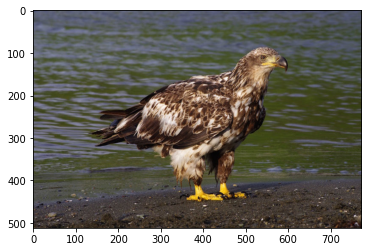

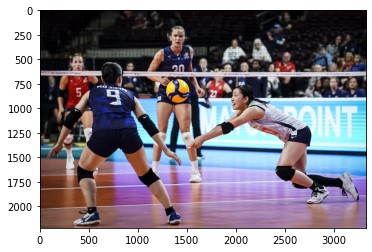

In [13]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
#input_image
im = Image.open("Original.jpg")
im_list = np.asarray(im)
plt.imshow(im_list)
plt.show()

im = Image.open("volleyball.jpeg")
im_list = np.asarray(im)
plt.imshow(im_list)
plt.show()


############# Problem 4 ###############

Create a file for learning

Learn new data (Simpsons dataset). Read the Training section of the README.md and create the necessary files to train the Simpsons dataset.

The format of the annotation file is different from the implementation of Problem 1, so it needs to be converted.

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [15]:
annotation_df = pd.read_csv('annotation_rcnn.txt',header=None)
print(annotation_df.head())

                                                   0    1    2    3    4  \
0  simpsons_dataset/abraham_grampa_simpson/pic_00...   57   72   52   72   
1  simpsons_dataset/abraham_grampa_simpson/pic_00...   80   31  337  354   
2  simpsons_dataset/abraham_grampa_simpson/pic_00...  128   48  285  407   
3  simpsons_dataset/abraham_grampa_simpson/pic_00...   72  126  158  275   
4  simpsons_dataset/abraham_grampa_simpson/pic_00...  123   61  294  416   

                        5  
0  abraham_grampa_simpson  
1  abraham_grampa_simpson  
2  abraham_grampa_simpson  
3  abraham_grampa_simpson  
4  abraham_grampa_simpson  


In [16]:
le = LabelEncoder()
annotation_df.iloc[:,5] = le.fit_transform(annotation_df.iloc[:,5])

Converting annotation file format

In [17]:
rcnn_path = 'annotation_rcnn.txt'
yolo_path = 'annotation.txt'
n_sample, n_col = annotation_df.shape
with open(rcnn_path) as f:
    lines = f.readlines() 
    for i in range(n_sample):
        line = lines[i]
        split_line = line.split(',') 
        image_path = split_line[0]
        split_line[0] = './' + image_path
        split_line[-1] = str(annotation_df.iloc[i,5]) + '\n'  
        with open(yolo_path, mode='a') as out_f:
            join_line = ','.join(split_line)  
            join_line = join_line.replace('.jpg,','.jpg ')  
            out_f.write(join_line)

In [18]:
annotation_df = pd.read_csv('annotation.txt',header=None)
print(annotation_df.head())

                                                   0    1    2    3  4
0  ./simpsons_dataset/abraham_grampa_simpson/pic_...   72   52   72  0
1  ./simpsons_dataset/abraham_grampa_simpson/pic_...   31  337  354  0
2  ./simpsons_dataset/abraham_grampa_simpson/pic_...   48  285  407  0
3  ./simpsons_dataset/abraham_grampa_simpson/pic_...  126  158  275  0
4  ./simpsons_dataset/abraham_grampa_simpson/pic_...   61  294  416  0


In [10]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


########## Problem 5 ############

Confirmation that learning can be done

Use the file you created in Problem 4 to learn. If it takes a long time to learn in the execution environment, you can just confirm that you can learn.

In [5]:
!python train.py

Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
2022-07-21 03:55:31.685900: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2022-07-21 03:55:31.724569: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:983] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-07-21 03:55:31.725203: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1639] Found device 0 with properties: 
name: Tesla T4 major: 7 minor: 5 memoryClockRate(GHz): 1.59
pciBusID: 0000:00:04.0
2022-07-21 03:55:31.748482: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
2022-07-21 03:55:31.920703: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcublas.so.10
2022-07-21 03:55:31.928765: I tensorflow/